# Financiamento Imobiliário

Neste notebook são derivadas fórmulas relativas ao financimento de imóveis segundo o sistema SAC e implementadas  e simuladas para um caso específico.



# Derivações de fórmulas

## Definições



- $V$: valor do imóvel
- $E$: valor de entrada
- $F$: valor do financiamento = $V - E$ 
- $\tau$: taxa de juros (efetiva) mensal
- $t$: mês
- $T$: prazo do financiamento em meses
- $D$: saldo devedor



## Valor da Parcela
Por definição, temos que a parcela $P$ a ser paga num determinado mês $t$ é dada pelo valor a ser amortizado $A(t)$ somado aos juros $j(t)$:

$$P(t) = A(t) + J(t).$$

O valor de amortização é constante e dado pela valor financiamento dividido pelo número total de parcelas a serem pagas:

$$A(t) = \frac{F}{T} = \frac{V - E}{T}.$$

Já o juros $J(t)$ é o juros sobre o saldo devedor no mês $t$: $D(t)$, ou seja:

$$J(t) = \tau D(t).$$

O salvo devedor $D(t)$ é o valor do financiamento $F$ menos o total que já foi amortizado até o mês $t$, que nada mais é do que o número de meses anteriores ($t-1$) multiplicado pelo valor da amortização $A$:

$$D(t) = F - (t-1)A = F - (t-1)\frac{F}{T} = F\left (1 - \frac{t-1}{T}\right).$$

Portanto, temos então para o valor da parcela:

$$P(t) = A + J(t) = \frac{F}{T} + \tau F\left (1 - \frac{t-1}{T}\right).$$ 

Podemos dividir a equação acima pelo valor do Financiamento $F$, para termos grandezas normalizadas como frações de $F$, que denotamos por suas respectivas letras minúsculas:

$$p(t) = a + j(t) = \frac{1}{T} + \tau \left (1 - \frac{t-1}{T}\right).$$ 

A equação acima é linear em $t$, ou seja, a parcela decresce linearmente com o mês:

$$p(t)  = -\alpha t + \beta,$$

onde

$$\alpha = \frac{\tau}{T},\quad \beta = \frac{1}{T} + \tau \left(1 + \frac{1}{T}\right).$$


Podemos também escrever o valor da parcela em relação ao valor to imóvel. Considerando uma entrada $E$, temos  de $V = E + F$ que $F = V - E = V(1-\epsilon)$. Então:

$$p_V(t) = (1-\epsilon) p(t)  = (1-\epsilon)\left[ \frac{1}{T} + \tau \left (1 - \frac{t-1}{T}\right)\right].$$

## Valor total a ser pago 
Algo interessante de se calcular é o total a ser pago ao longo de todo financiamento, que é dado pela soma das parcelas:

$$\mathcal{f} = \sum\limits_{t=1}^T p(t) = \beta T - \alpha  \sum\limits_{t=1}^T t = \beta T - \alpha\frac{T(T+1)}{2}$$

$$\Rightarrow \mathcal{f} = T\left[ \frac{1}{T} + \tau \left(1 + \frac{1}{T}\right)\right] - \frac{\tau}{2}(T+1)$$

$$ \Rightarrow \mathcal{f} = 1 + \tau \left(\frac{T+1}{2}\right).$$

Lembrando que esse valor é normalizado em função do valor do financiamento $F$, podemos calcular explicitamente o valor total pago, $\mathcal{V}$, considerando um valor de imóvel $V$ e um valor de entrada $E$: 

$$\mathcal{V} = E + f  F = E + (V-E)f.$$

Definindo $\epsilon:=E/V$ como a fração da entrada em relação ao valor do imóvel $V$ e dividindo a equação acima por $V$, obtemos o % pago em relação ao valor do imóvel, $v$, obtemos:

$$v = \frac{\mathcal{V}}{V} = \epsilon + (1-\epsilon)\left[1 + \tau \left(\frac{T+1}{2}\right)\right] = 1 + \tau \left( \frac{T+1}{2}\right)(1-\epsilon).$$



# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick

In [3]:
sns.set_style('whitegrid')

# Funções

In [4]:
def saldo_devedor_por_mes(mes, taxa_de_juros_ao_mes, prazo_em_meses):
    return 1 - (mes-1)/prazo_em_meses


def juros_por_mes(mes, taxa_de_juros_ao_mes, prazo_em_meses):
    return taxa_de_juros_ao_mes * saldo_devedor_por_mes(mes, taxa_de_juros_ao_mes, prazo_em_meses)


def valor_total_pago(fracao_entrada, taxa_de_juros_ao_mes, prazo_em_meses):
    return fracao_entrada + (1 - fracao_entrada)* (1 + taxa_de_juros_ao_mes * (prazo_em_meses+1)/2 )


def parcela_sobre_valor_financiado(mes, taxa_de_juros_ao_mes, prazo_em_meses):
    return 1/prazo_em_meses + juros_por_mes(mes, taxa_de_juros_ao_mes, prazo_em_meses)


def parcela_sobre_valor_do_imovel(fracao_entrada, mes, taxa_de_juros_ao_mes, prazo_em_meses):
    return (1 - fracao_entrada) * parcela_sobre_valor_financiado(mes, taxa_de_juros_ao_mes, prazo_em_meses)


def converte_para_taxa_mensal(taxa_anual):
    return (1 + taxa_anual)**(1/12)-1


def calcula_valor_presente(parcelas, taxa_livre_de_risco):
    valor_presente = (parcelas/(1+taxa_livre_de_risco)**np.arange(1,len(parcelas)+1)).sum()
    return valor_presente


def simula_financiamento(valor_do_imovel, valor_da_entrada, taxa_de_juros_ao_ano, prazo_em_meses):
    valor_do_financiamento = valor_do_imovel - valor_da_entrada
    fracao_entrada = valor_da_entrada/valor_do_imovel
    taxa_de_juros_ao_mes = converte_para_taxa_mensal(taxa_de_juros_ao_ano)

    meses = np.arange(1, prazo_em_meses + 1)
    saldo_devedor = saldo_devedor_por_mes(meses, taxa_de_juros_ao_mes, prazo_em_meses)
    juros = saldo_devedor * taxa_de_juros_ao_mes
    amortizacao = 1/prazo_em_meses
    parcelas = amortizacao + juros
    
    Saldo_devedor = valor_do_financiamento * saldo_devedor
    Juros = valor_do_financiamento * juros
    Parcelas = valor_do_financiamento * parcelas
    Amortizacao = valor_do_financiamento * amortizacao  
    
    return pd.DataFrame(
        data = {
         'mes': meses,
         'parcela': Parcelas,
         'amortizacao': Amortizacao, 
         'juros': Juros,
         'saldo_devedor': Saldo_devedor            
        }
    )

In [5]:
pct_fmt = mtick.PercentFormatter(xmax=1)

# Simulação

## dados de entrada

In [10]:
prazo_em_meses = 360 # 30 anos
taxa_de_juros_ao_ano = 0.1139
taxa_livre_de_risco = converte_para_taxa_mensal(0.1341)
taxa_de_juros_ao_mes = converte_para_taxa_mensal(taxa_de_juros_ao_ano)

valor_do_imovel = 520000
valor_da_entrada = 300000

valor_do_financiamento = valor_do_imovel - valor_da_entrada
fracao_entrada = valor_da_entrada/valor_do_imovel

In [11]:
df = simula_financiamento(valor_do_imovel, valor_da_entrada, taxa_de_juros_ao_ano, prazo_em_meses)

In [27]:
df2 = simula_financiamento(valor_do_imovel, valor_da_entrada, 0.0901, prazo_em_meses)

In [28]:
df3 = simula_financiamento(valor_do_imovel, valor_da_entrada, 0.1041, prazo_em_meses)

In [24]:
df

,mes,parcela,amortizacao,juros,saldo_devedor
0,1,2597.594398,611.111111,1986.483287,220000.000000
1,2,2592.076389,611.111111,1980.965278,219388.888889
2,3,2586.558380,611.111111,1975.447269,218777.777778
3,4,2581.040371,611.111111,1969.929260,218166.666667
4,5,2575.522362,611.111111,1964.411251,217555.555556
...,...,...,...,...,...
355,356,638.701157,611.111111,27.590046,3055.555556
356,357,633.183148,611.111111,22.072037,2444.444444
357,358,627.665139,611.111111,16.554027,1833.333333
358,359,622.147129,611.111111,11.036018,1222.222222


In [29]:
df2

,mes,parcela,amortizacao,juros,saldo_devedor
0,1,2198.416249,611.111111,1587.305138,220000.000000
1,2,2194.007068,611.111111,1582.895957,219388.888889
2,3,2189.597887,611.111111,1578.486776,218777.777778
3,4,2185.188706,611.111111,1574.077595,218166.666667
4,5,2180.779525,611.111111,1569.668414,217555.555556
...,...,...,...,...,...
355,356,633.157016,611.111111,22.045905,3055.555556
356,357,628.747835,611.111111,17.636724,2444.444444
357,358,624.338654,611.111111,13.227543,1833.333333
358,359,619.929473,611.111111,8.818362,1222.222222


In [30]:
df3

,mes,parcela,amortizacao,juros,saldo_devedor
0,1,2434.182851,611.111111,1823.071740,220000.000000
1,2,2429.118763,611.111111,1818.007652,219388.888889
2,3,2424.054675,611.111111,1812.943563,218777.777778
3,4,2418.990586,611.111111,1807.879475,218166.666667
4,5,2413.926498,611.111111,1802.815387,217555.555556
...,...,...,...,...,...
355,356,636.431552,611.111111,25.320441,3055.555556
356,357,631.367464,611.111111,20.256353,2444.444444
357,358,626.303376,611.111111,15.192264,1833.333333
358,359,621.239287,611.111111,10.128176,1222.222222


Text(0.5, 0, 'mês')

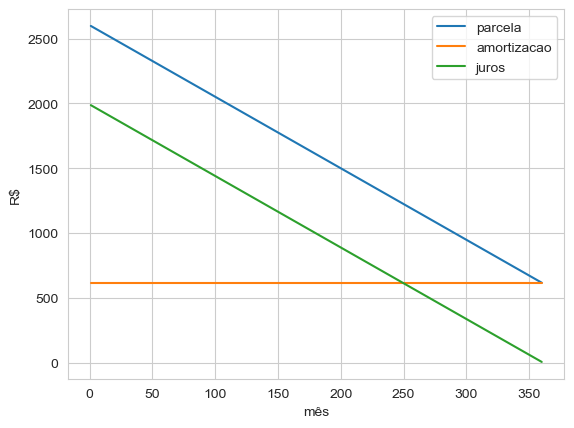

In [12]:
ax=df.set_index('mes')[['parcela', 'amortizacao', 'juros']].plot()
ax.set_ylabel("R$")
ax.set_xlabel('mês')

Text(0.5, 0, 'mês')

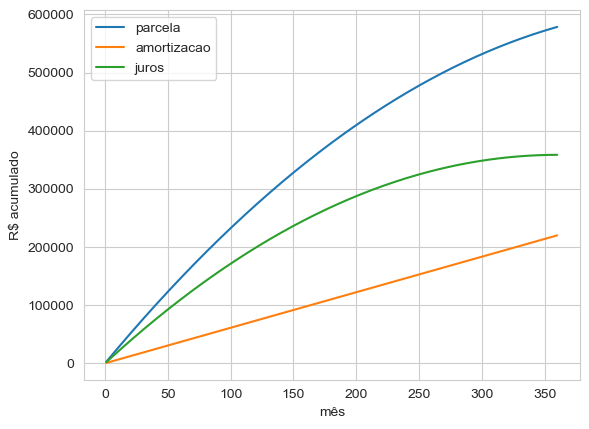

In [13]:
ax=df.set_index('mes')[['parcela', 'amortizacao', 'juros']].cumsum().plot()
ax.set_ylabel("R$ acumulado")
ax.set_xlabel('mês')

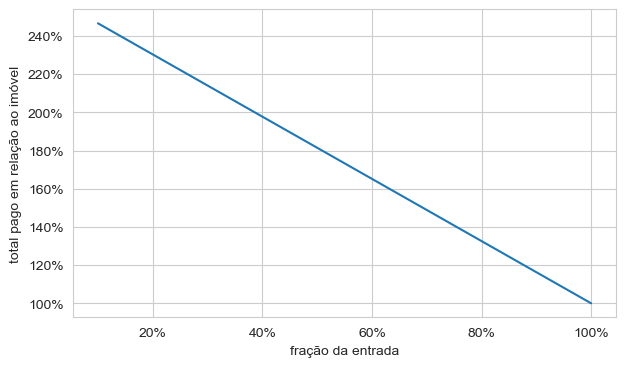

In [14]:
fracao_entrada = np.arange(0.1, 1.1, 0.1)

f, ax = plt.subplots(1,1,figsize=(7,4), dpi=100)

fracao_valor_total = valor_total_pago(fracao_entrada, taxa_de_juros_ao_mes, prazo_em_meses)
ax.plot(fracao_entrada, fracao_valor_total)

ax.set_xlabel('fração da entrada')
ax.set_ylabel('total pago em relação ao imóvel')
ax.xaxis.set_major_formatter(pct_fmt)
ax.yaxis.set_major_formatter(pct_fmt)

In [16]:
valor_presente = (calcula_valor_presente(df.parcela, taxa_livre_de_risco) + valor_da_entrada)

In [17]:
valor_presente

496564.53965810593

In [19]:
valor_presente/valor_do_imovel

0.9549318070348191